In [1]:
import pandas as pd, matplotlib.pyplot as plt, geopandas as gpd, contextily as ctx, numpy as np

In [3]:
rosetta0 = pd.read_csv("rosetta.csv")
rosetta0.columns

Index(['Unnamed: 0', 'PERSONA_REF_ID', 'HOGAR_REF_ID', 'SEXO', 'EDAD',
       'P_NACDAD', 'P_ALFAB', 'P_CONMPU', 'P_ASISTEDU', 'P_NIVELED',
       'P_COMPLED', 'CONDACT', 'VIVIENDA_REF_ID', 'H_MAT_PISO', 'H_MAT_CUBTA',
       'H_REVEST', 'H_AGUA', 'H_PROC_AGUA', 'BAÑO', 'H_LIMP_I', 'H_DESAGUE_I',
       'H_BAÑO_EXC', 'H_COMBUST', 'H_HABI_DOR', 'H_HABI_TOT', 'HELADERA',
       'H_COMPUTADORA', 'CELULAR', 'TELEFONO', 'PROP', 'INDHAC', 'TOTPERS',
       'ALGUNBI', 'RADIO_REF_ID', 'VV_TIPO', 'VV_PART', 'VV_OCUP', 'VV_COLEC',
       'VV_CALIDAD_SERVS', 'VV_CALIDAD_MAT', 'VV_CALIDAD_CONS', 'RADIO'],
      dtype='object')

In [14]:
rosetta = rosetta0.drop(['Unnamed: 0'], axis=1)
NBI = rosetta[["RADIO","ALGUNBI"]]
NBI


,RADIO,ALGUNBI
0,20010101,0
1,20010101,0
2,20010101,0
3,20010101,0
4,20010101,1
...,...,...
2890146,20152113,2
2890147,20152113,2
2890148,20152113,2
2890149,20152113,2


In [16]:
NBI_M = pd.merge(NBI,tabla_intermedia0,on="RADIO",how="inner")
NBI_M

,RADIO,ALGUNBI,Unnamed: 0,circuito,RADIO.CIRCUITO
0,20010101,0,0,5,20010005
1,20010101,0,0,5,20010005
2,20010101,0,0,5,20010005
3,20010101,0,0,5,20010005
4,20010101,1,0,5,20010005
...,...,...,...,...,...
2888477,20152113,2,3549,158,20150158
2888478,20152113,2,3549,158,20150158
2888479,20152113,2,3549,158,20150158
2888480,20152113,2,3549,158,20150158


In [10]:
tabla_intermedia0 = pd.read_csv("intermedia.csv")
tabla_intermedia0

,Unnamed: 0,RADIO,circuito,RADIO.CIRCUITO
0,0,20010101,5,20010005
1,1,20010201,5,20010005
2,2,20010202,5,20010005
3,3,20010203,5,20010005
4,4,20010204,5,20010005
...,...,...,...,...
3545,3545,20152109,158,20150158
3546,3546,20152110,158,20150158
3547,3547,20152111,158,20150158
3548,3548,20152112,158,20150158


In [31]:
NBI_ME = pd.merge(tabla_intermedia,NBI_M,on="RADIO",how="inner")
NBI_ME.rename(columns={"circuito_x":"circuito"},inplace=True)
NBI_ME = NBI_ME[["circuito","ALGUNBI"]]
NBI_ME

,circuito,ALGUNBI
0,0005,0
1,0005,0
2,0005,0
3,0005,0
4,0005,1
...,...,...
2888477,0158,2
2888478,0158,2
2888479,0158,2
2888480,0158,2


In [37]:
NBI_agrupado = NBI_ME.groupby(['circuito']).mean()
NBI_agrupado

,ALGUNBI
circuito,
0001,0.128237
0002,0.227173
0003,0.200893
0004,0.010862
0005,0.449893
...,...
0163,0.107805
0164,0.197734
0165,0.063305


In [40]:
NBI_agrupado


,index,circuito,ALGUNBI
0,0,0001,0.128237
1,1,0002,0.227173
2,2,0003,0.200893
3,3,0004,0.010862
4,4,0005,0.449893
...,...,...,...
162,162,0163,0.107805
163,163,0164,0.197734
164,164,0165,0.063305
165,165,0166,0.045915


In [21]:
tabla_intermedia['circuito'] = strp
tabla_intermedia

C:\Users\Angelo\AppData\Local\Temp\ipykernel_2492\4011873043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla_intermedia['circuito'] = strp


,RADIO,circuito,RADIO.CIRCUITO
0,20010101,0005,20010005
1,20010201,0005,20010005
2,20010202,0005,20010005
3,20010203,0005,20010005
4,20010204,0005,20010005
...,...,...,...
3545,20152109,0158,20150158
3546,20152110,0158,20150158
3547,20152111,0158,20150158
3548,20152112,0158,20150158


<AxesSubplot:>

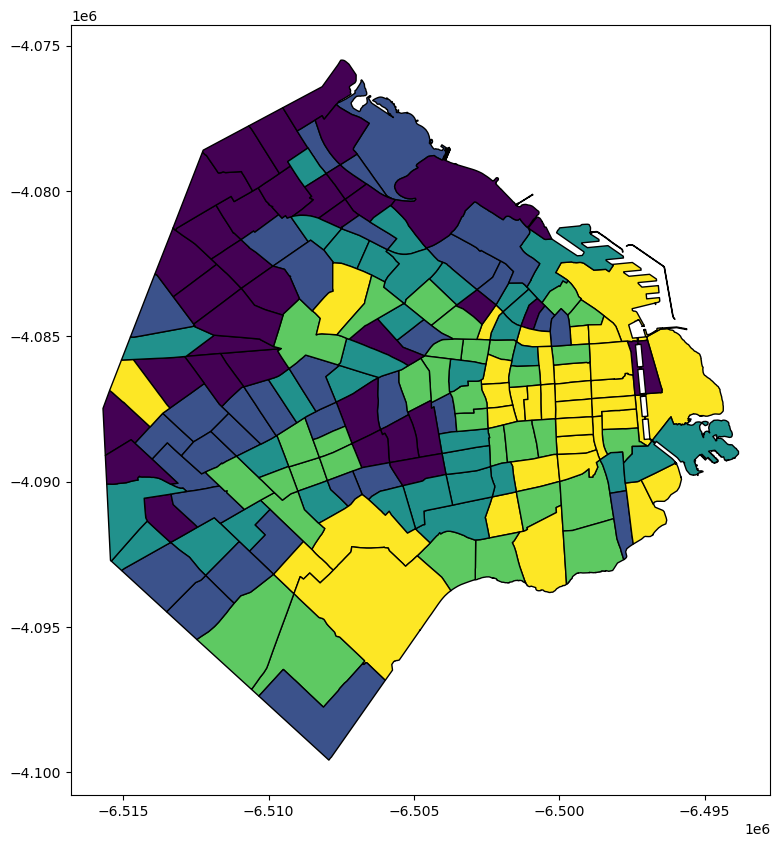

In [46]:
NBI_MERG = pd.merge(circuitos_geometria,NBI_agrupado,on="circuito",how="inner")
NBI_MERG.plot(column='ALGUNBI', scheme='quantiles', figsize=(10, 10),edgecolor="k")

In [26]:
circuitos_geometria = gpd.read_file("CABA.shp")
circuitos_geometria = circuitos_geometria[["circuito",	"geometry"]]
circuitos_geometria

,circuito,geometry
0,0003,"POLYGON Z ((-6496304.252 -4084732.697 0.000, -..."
1,0045,"POLYGON Z ((-6501230.474 -4091702.182 0.000, -..."
2,0037,"POLYGON Z ((-6501166.688 -4087904.826 0.000, -..."
3,0018,"POLYGON Z ((-6498832.986 -4088373.028 0.000, -..."
4,0141,"POLYGON Z ((-6503862.400 -4078547.361 0.000, -..."
...,...,...
162,0135,"POLYGON Z ((-6507834.614 -4077215.626 0.000, -..."
163,0149,"POLYGON Z ((-6503253.371 -4080723.227 0.000, -..."
164,0101,"POLYGON Z ((-6515182.479 -4090061.116 0.000, -..."
165,0102,"POLYGON Z ((-6514598.831 -4088679.114 0.000, -..."


### NBI